<a href="https://colab.research.google.com/github/karinstefa/ML_Project/blob/main/TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa 
#import librosa.display
from IPython.display import Audio
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
plt.style.use('ggplot')

In [2]:
paths=[]
labels=[]

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Uniandes/ML/Proyecto/Emotions/input/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename[::-1].split('.')[0][::-1]
        name = dirname[::].split('/')[9]
        name_complete = name+'.'+label
        labels.append(name_complete.lower())



In [3]:
data = pd.DataFrame({'speech':paths,'label':labels})
data.sample(30)

,speech,label
86,/content/drive/MyDrive/Uniandes/ML/Proyecto/Em...,happy.wav
739,/content/drive/MyDrive/Uniandes/ML/Proyecto/Em...,happy.wav
1137,/content/drive/MyDrive/Uniandes/ML/Proyecto/Em...,happy.wav
1737,/content/drive/MyDrive/Uniandes/ML/Proyecto/Em...,happy.wav
1364,/content/drive/MyDrive/Uniandes/ML/Proyecto/Em...,happy.wav
467,/content/drive/MyDrive/Uniandes/ML/Proyecto/Em...,happy.wav
972,/content/drive/MyDrive/Uniandes/ML/Proyecto/Em...,happy.wav
774,/content/drive/MyDrive/Uniandes/ML/Proyecto/Em...,happy.wav
667,/content/drive/MyDrive/Uniandes/ML/Proyecto/Em...,happy.wav
1740,/content/drive/MyDrive/Uniandes/ML/Proyecto/Em...,happy.wav


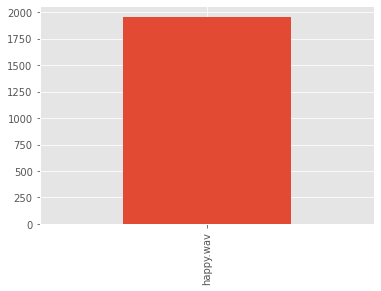

In [4]:
data['label'].value_counts().plot(kind='bar');

In [13]:
import librosa.display

def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    
def ana_emotion(emotion:str, df:pd.DataFrame):
    path=np.array(df['speech'][df['label']==emotion])[0]
    data,sampling_rate=librosa.load(path)
    waveplot(data,sampling_rate,emotion)
    spectogram(data,sampling_rate,emotion)
    display(Audio(path))

In [14]:
data = data[data.label.apply(lambda x: x != '.ds_store')]

In [15]:
data['label'].unique().tolist()

['happy.wav']

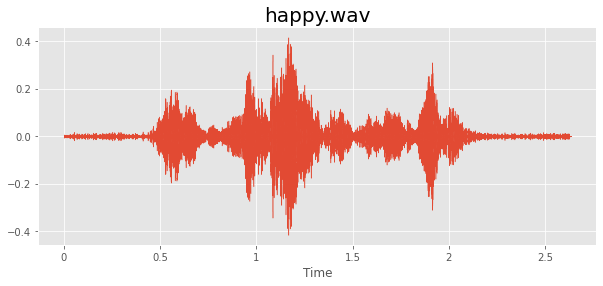

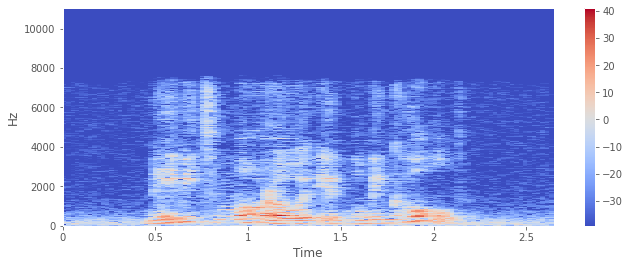

In [16]:
for i in data['label'].unique().tolist(): # ver uno de cada sentimiento
    ana_emotion(i,data)